**Ankit Sekseria**<br>
**D19005**<br>
**Varishu Pant**<br>
**D19033**

## Question 1:
*Read the context carefully:*<br>
The term hierarchical refers to the fact that clusters obtained by cutting the dendrogram at a given height are necessarily nested within the clusters obtained by cutting the dendrogram at any greater height. However, on an arbitrary data set, this assumption of hierarchical structure might be unrealistic. For instance, suppose that our observations correspond to a group of people with a 50–50 split of males and females, evenly split among Americans, Japanese, and French. We can imagine a scenario in which the best division into two groups might split these people by gender, and the best division into three groups might split them by nationality. In this case, the true clusters are not nested, in the sense that the best division into three groups does not result from taking the best division into two groups and splitting up one of those groups. Consequently, this situation could not be well-represented by hierarchical clustering. Due to situations such as this one, hierarchical clustering can sometimes yield worse (i.e. less accurate) results than K-means clustering for a given number of clusters.
*The above context states a very important limitation of hierarchical clustering algorithm. Perform an experiment with simulated data or data of your selection to validate the above concept. (Note that you will not be judged based on the complexity of the data you are working with. Remember that, simpler the data better the explanation you can give. You will be marked based on the clarity of your communication and presentation). Include all necessary results.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
ethnic= pd.read_csv('ethnic.csv',encoding='utf-8')    #loading data
ethnic_cpy=ethnic.copy()

In [4]:
ethnic.head()  

,Gender,Country
0,Male,American
1,Male,American
2,Male,American
3,Male,American
4,Male,American


In [5]:
print('Distribution of Gender\n',ethnic.Gender.value_counts()) #distribution of gender
print('Distribution of Country\n',ethnic.Country.value_counts()) #distribution of country

Distribution of Gender
 Female    45
Male      45
Name: Gender, dtype: int64
Distribution of Country
 Japanese    30
American    30
French      30
Name: Country, dtype: int64


We have 50% males and 50% females. Same proportion(33.33%) of ethicity for Country.

In [6]:
ethnic.Gender=ethnic.Gender.map({'Male':0,'Female':1})   #label encoding Gender.
ethnic.Country=ethnic.Country.map({'American':0,'Japanese':1,'French':2})  #label encoding Country.
ethnic.head()

,Gender,Country
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


## Heirarchical Clustering

#### Visualising Dendogram

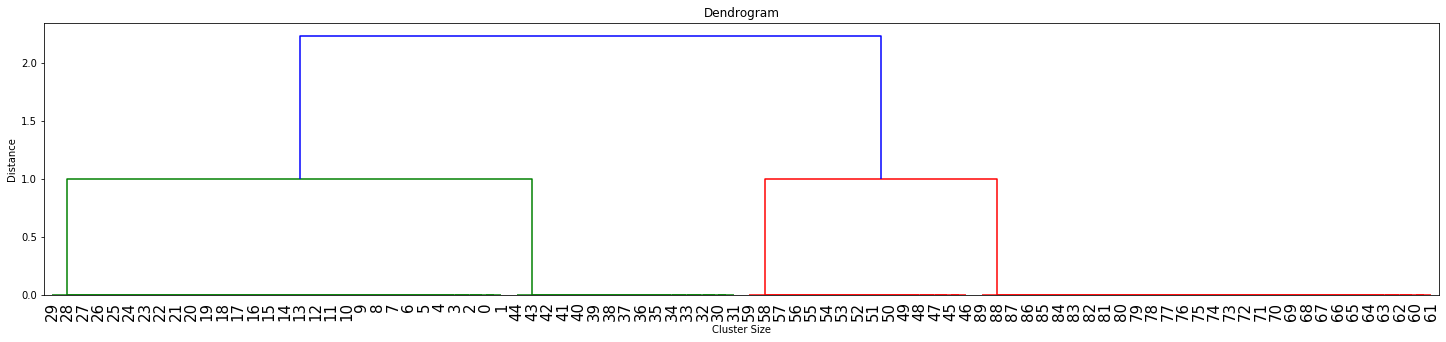

In [12]:
plt.rcParams['figure.figsize'] = [25, 5]

from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(ethnic, 'complete',metric='euclidean')
dendrogram(Z,leaf_rotation=90, leaf_font_size=15)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()

#### Observation
- Here we can see that there are 4 subsets of 2 larger sets.
- We are expecting two cluster of Gender(Male and female) and 3 clusters based country they belong,but here the case is different in heirarchical clustering the subgroup formed after clustering is homogeneous.<br>
*Let us verify this with demonstrations shown below:*

#### Applying Agglomerative Clustering for 2 clusters
- Our Expectation is get two clusters based on Gender.

In [54]:
from sklearn.cluster import AgglomerativeClustering  
hclust = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete') #euclidean
hclust.fit(ethnic)  #fitting the data

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

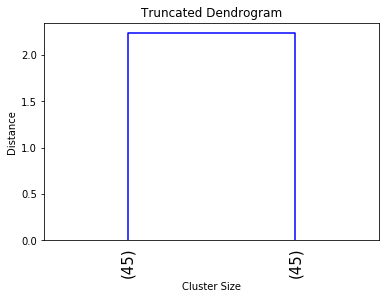

In [55]:
#visualising dendogram for two clusters
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(ethnic, 'complete',metric='euclidean')
dendrogram(Z,truncate_mode='lastp',p=2,leaf_rotation=90, leaf_font_size=15.) #n_clusters=2
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [56]:
ethnic_cpy['heir_2']=hclust.labels_ #assigning labels

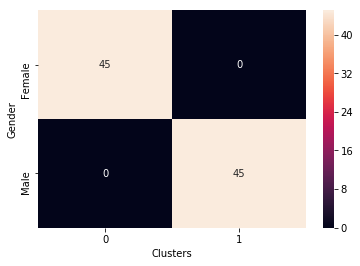

In [57]:
#ploting crosstab
tab=pd.crosstab(ethnic_cpy.Gender,ethnic_cpy.heir_2,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- We can clearly see that we  have two separate clusters formed based on Gender.
- Cluster 0  has all females and Cluster 1 has all males.

*Let's see what happens when we divide the cluster into 3 groups,our expectation is to get 3 clusters, grouped based on the<br> Country they belong to*.

#### Applying Agglomerative Clustering for 3 clusters
- Our Expectation is get three clusters based on the country they belong to.

In [58]:
from sklearn.cluster import AgglomerativeClustering  #heirarchical clustering
hclust = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') #euclidean for 3 clusters
hclust.fit(ethnic)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

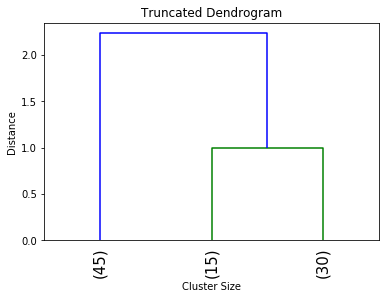

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage 
Z = linkage(ethnic, 'complete',metric='euclidean') #linkage=complete
dendrogram(Z,truncate_mode='lastp',p=3,leaf_rotation=90, leaf_font_size=15.) #n_clusters=3
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [60]:
ethnic_cpy['heir_3']=hclust.labels_  #assigning labels for number of cluster as 3.
ethnic_cpy.heir_3.value_counts()

0    45
1    30
2    15
Name: heir_3, dtype: int64

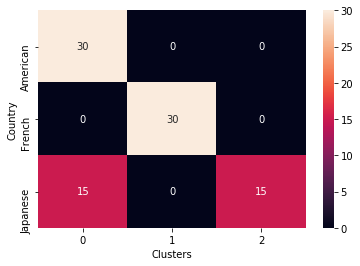

In [61]:
tab=pd.crosstab(ethnic_cpy.Country,ethnic_cpy.heir_3,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- We can see that cluster1 has French people,whereas Cluster2 and Cluster0 fails to capture a particular ethnicity.
- Cluster0 has Japanese and American, Cluster2 has only half of the Japanese people.
- So,Heirachical clustering fails to identify nested subgroups.

## KMeans Clustering

#### Applying KMeans Clustering for 2 clusters
- Our Expectation is get two clusters based on Gender.

In [62]:
from sklearn.cluster import KMeans #importing KMeans
kmeans = KMeans(n_clusters=2) #Kmeans for 2 clusters
kmeans.fit(ethnic)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
ethnic_cpy['kmeans_2']=kmeans.labels_  #assigning labels for custers formed.

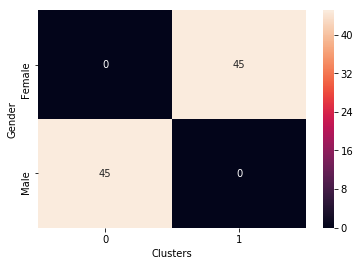

In [64]:
#ploting crosstab
tab=pd.crosstab(ethnic_cpy.Gender,ethnic_cpy.kmeans_2,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- We can clearly see that we  have two separate clusters formed based on Gender.
- Cluster 0  has all females and Cluster 1 has all males.

*Let's see what happens when we divide the cluster into 3 groups,our expectation is to get 3 clusters, grouped based on the<br> Country they belong to*.

#### Applying KMeans Clustering for 3 clusters
- Our Expectation is get three clusters based on the country they belong to.

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)  #for 3 clusters
kmeans.fit(ethnic)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
ethnic_cpy['kmeans_3']=kmeans.labels_  #assigning labels

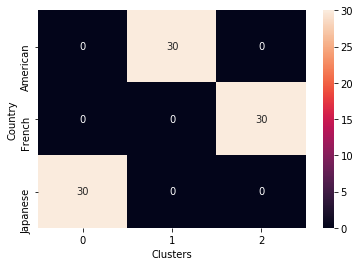

In [67]:
#ploting crosstab
tab=pd.crosstab(ethnic_cpy.Country,ethnic_cpy.kmeans_3,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- We can see that cluster1 has American people.
- Cluster2 has all French people.
- Cluster0 has all 30 Japanese people.

## Conclusion
- Kmeans does a good job with respect to Heirarchical Clustering in forming ideal groups.
- For identifing nested subgroups,Heirarchical clustering fails but kmeans is able to identify those subgroups(in here,country they belong to).